Degree 1: mean Bias^2=0.204, mean Var=0.009, Total=0.302
Degree 3: mean Bias^2=0.005, mean Var=0.015, Total=0.110
Degree 9: mean Bias^2=0.000, mean Var=0.041, Total=0.132


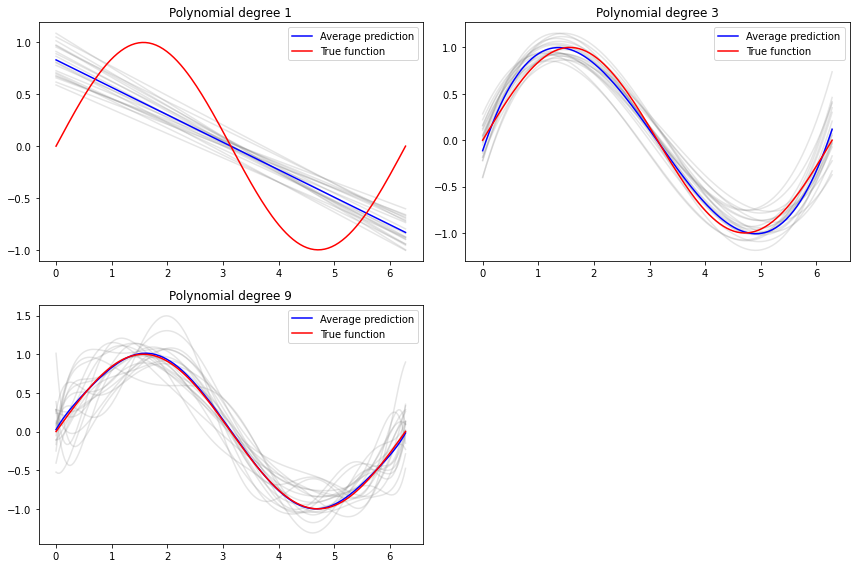

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# True function
def f(x):
    return np.sin(x)

# Simulation parameters
n_points = 20       # sample size per dataset
n_trials = 200      # number of datasets to simulate
x_domain = np.linspace(0, 2*np.pi, 200)
true_y = f(x_domain)

# Different model complexities (poly degrees)
degrees = [1, 3, 9]

# Storage for results
plt.figure(figsize=(12, 8))

for idx, deg in enumerate(degrees, 1):
    preds = []  # store predictions from all trials

    for _ in range(n_trials):
        # Generate noisy training data
        x_train = np.linspace(0, 2*np.pi, n_points)
        y_train = f(x_train) + np.random.normal(0, 0.3, size=n_points)

        # Fit polynomial regression
        coeffs = np.polyfit(x_train, y_train, deg)
        model = np.poly1d(coeffs)

        # Predict on domain
        preds.append(model(x_domain))

    preds = np.array(preds)

    # Compute bias, variance, noise
    avg_pred = preds.mean(axis=0)
    bias2 = (avg_pred - true_y)**2
    var = preds.var(axis=0)
    noise = 0.3**2   # known since we added Gaussian noise

    # Plot results
    plt.subplot(2, 2, idx)
    plt.title(f"Polynomial degree {deg}")
    for i in range(20):  # plot a few trials
        plt.plot(x_domain, preds[i], color="gray", alpha=0.2)
    plt.plot(x_domain, avg_pred, color="blue", label="Average prediction")
    plt.plot(x_domain, true_y, color="red", label="True function")
    plt.legend()

    # Print decomposition at a representative point
    avg_pred = preds.mean(axis=0)
    bias2_curve = (avg_pred - true_y)**2
    var_curve = preds.var(axis=0)
    noise = 0.3**2
    print(f"Degree {deg}: mean Bias^2={bias2_curve.mean():.3f}, mean Var={var_curve.mean():.3f}, Total={(bias2_curve+var_curve+noise).mean():.3f}")

plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# True function
def f(x):
    return np.sin(x)

# Simulation parameters
n_points = 20       # number of training samples per dataset
n_trials = 200      # number of datasets to simulate
x_domain = np.linspace(0, 2*np.pi, 200)
true_y = f(x_domain)

deg = 1  # only fit a line

preds = []  # store predictions from all trials

for _ in range(n_trials):
    # Generate noisy training data
    x_train = np.linspace(0, 2*np.pi, n_points)
    y_train = f(x_train) + np.random.normal(0, 0.3, size=n_points)

    # Fit polynomial regression of degree 1 (linear regression)
    coeffs = np.polyfit(x_train, y_train, deg)
    y_pred = np.polyval(coeffs, x_domain)

    # Predict on the domain
    preds.append(y_pred)

preds = np.array(preds)
print(preds.shape)

# Compute bias, variance, noise
avg_pred = preds.mean(axis=0)
bias2_curve = (avg_pred - true_y)**2
var_curve = preds.var(axis=0)
noise = 0.3**2  # variance of noise

print(f"Degree {deg}: mean Bias^2={bias2_curve.mean():.3f}, "
      f"mean Var={var_curve.mean():.3f}, "
      f"Total={(bias2_curve+var_curve+noise).mean():.3f}")


(200, 200)
Degree 1: mean Bias^2=0.205, mean Var=0.008, Total=0.304


k=1: Bias^2=0.001, Var=0.097, Noise=0.090, Total=0.187
k=3: Bias^2=0.000, Var=0.039, Noise=0.090, Total=0.129
k=10: Bias^2=0.000, Var=0.032, Noise=0.090, Total=0.122
k=30: Bias^2=0.000, Var=0.022, Noise=0.090, Total=0.112


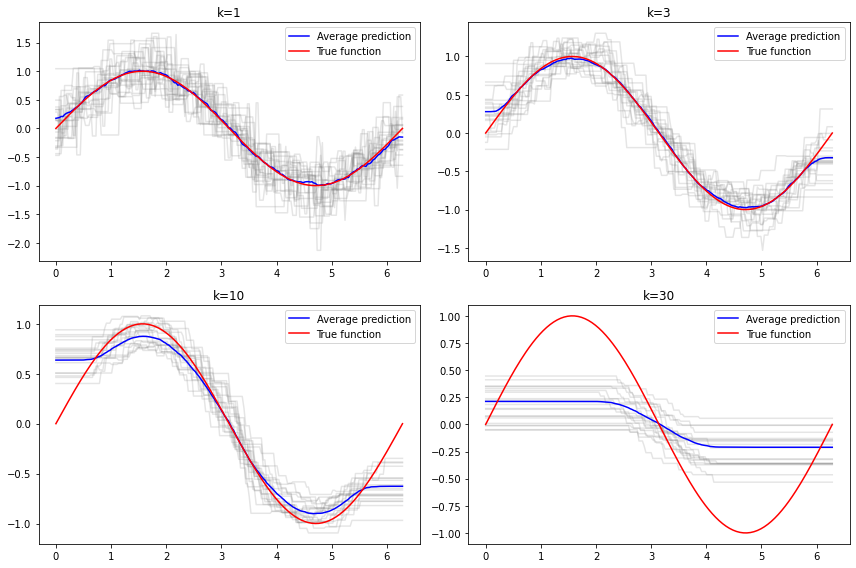

In [3]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# True function
def f(x): 
    return np.sin(x)

# Simulation settings
rng = np.random.default_rng(0)
xs = np.linspace(0, 2*np.pi, 200)     # evaluation grid
true_y = f(xs)

n_points = 40      # training set size
n_trials = 200     # number of repeated datasets
noise_sigma = 0.3  # noise level

# Different k values to test
k_values = [1, 3, 10, 30]

plt.figure(figsize=(12, 8))

for idx, k in enumerate(k_values, 1):
    preds = []

    for _ in range(n_trials):
        # Sample training data
        xtr = np.sort(rng.uniform(0, 2*np.pi, n_points))
        ytr = f(xtr) + rng.normal(0, noise_sigma, n_points)

        # Fit k-NN model
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(xtr.reshape(-1, 1), ytr)

        # Predict on grid
        preds.append(model.predict(xs.reshape(-1, 1)))

    preds = np.array(preds)

    # Bias^2, variance
    avg_pred = preds.mean(axis=0)
    bias2 = (avg_pred - true_y)**2
    var = preds.var(axis=0)
    noise = noise_sigma**2

    # Plot
    plt.subplot(2, 2, idx)
    plt.title(f"k={k}")
    for i in range(20):
        plt.plot(xs, preds[i], color="gray", alpha=0.2)
    plt.plot(xs, avg_pred, color="blue", label="Average prediction")
    plt.plot(xs, true_y, color="red", label="True function")
    plt.legend()

    # Print decomposition at middle point (x = π)
    mid = len(xs)//2
    print(f"k={k}: Bias^2={bias2[mid]:.3f}, Var={var[mid]:.3f}, Noise={noise:.3f}, "
          f"Total={bias2[mid]+var[mid]+noise:.3f}")

plt.tight_layout()
plt.show()